In [2]:
import matplotlib.pyplot as plt


d:\Miniconda\envs\sds20\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\Miniconda\envs\sds20\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
d:\Miniconda\envs\sds20\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
import networkx as nx
nx.__version__

'2.8.4'

* 连通性
  * 最大连通分支
  * 网络的渗流巨分支 存在/不存在
* 平均距离与小世界
  * 距离
    * 最短路径长度
  * 平均距离
    * 所有节点最短路径的平均长度
    * $ \left< d \right> =\frac{2}{N\left( N-1 \right)}\sum_{i>j}{d_{ij}} $
  * 小世界：大网络，平均距离小
  * Milgram
  * 小世界效应
    * 网络平均距离随网络规模的增长速度不超过随机网络
    * 随机网络的平均距离: 对数增长
      * $ \left< d \right> \propto  \ln  N $
    * 社交网络的平均距离随网络规模增大而减小 Liben-Nowell Leskovec
  * 小世界判定
    * 增长速度法
      * 缺点：静态网络不适用，需要演化过程
  * **巨分支的涌现依赖于删除节点阈值**
  * 平均距离计算与网络效率
    * 最大连通分支计算平均距离
    * 网络效率避免了只考虑最大连通分支的问题
* 度分布与无标度
  * 网络中度值为k的节点数占总结点数的比例，节点度值的概率分布函数构成度分布
  * 随机网络-泊松分布
  * www网络-幂函数-标度不变
* 簇系数
  * 节点簇系数：相邻节点连边数量占最大可能连边数的比例 %%纯理性批判里面可认知边界内可知的程度%%
  * 网络簇系数
* 节点中心性
  * 介数中心度 经过该节点的最短路径数目占所有最短路径的比例
  * 接近中心度 点与其他点最短距离的平均值
* 度相关性
  * 各节点邻居度值的平均的平均
  * 度正相关-度大的与度大的
* 剩余度分布

## 网络模型
* 规则网络：节点的度相同
* [Network generators](https://networkx.org/documentation/stable/reference/generators.html)


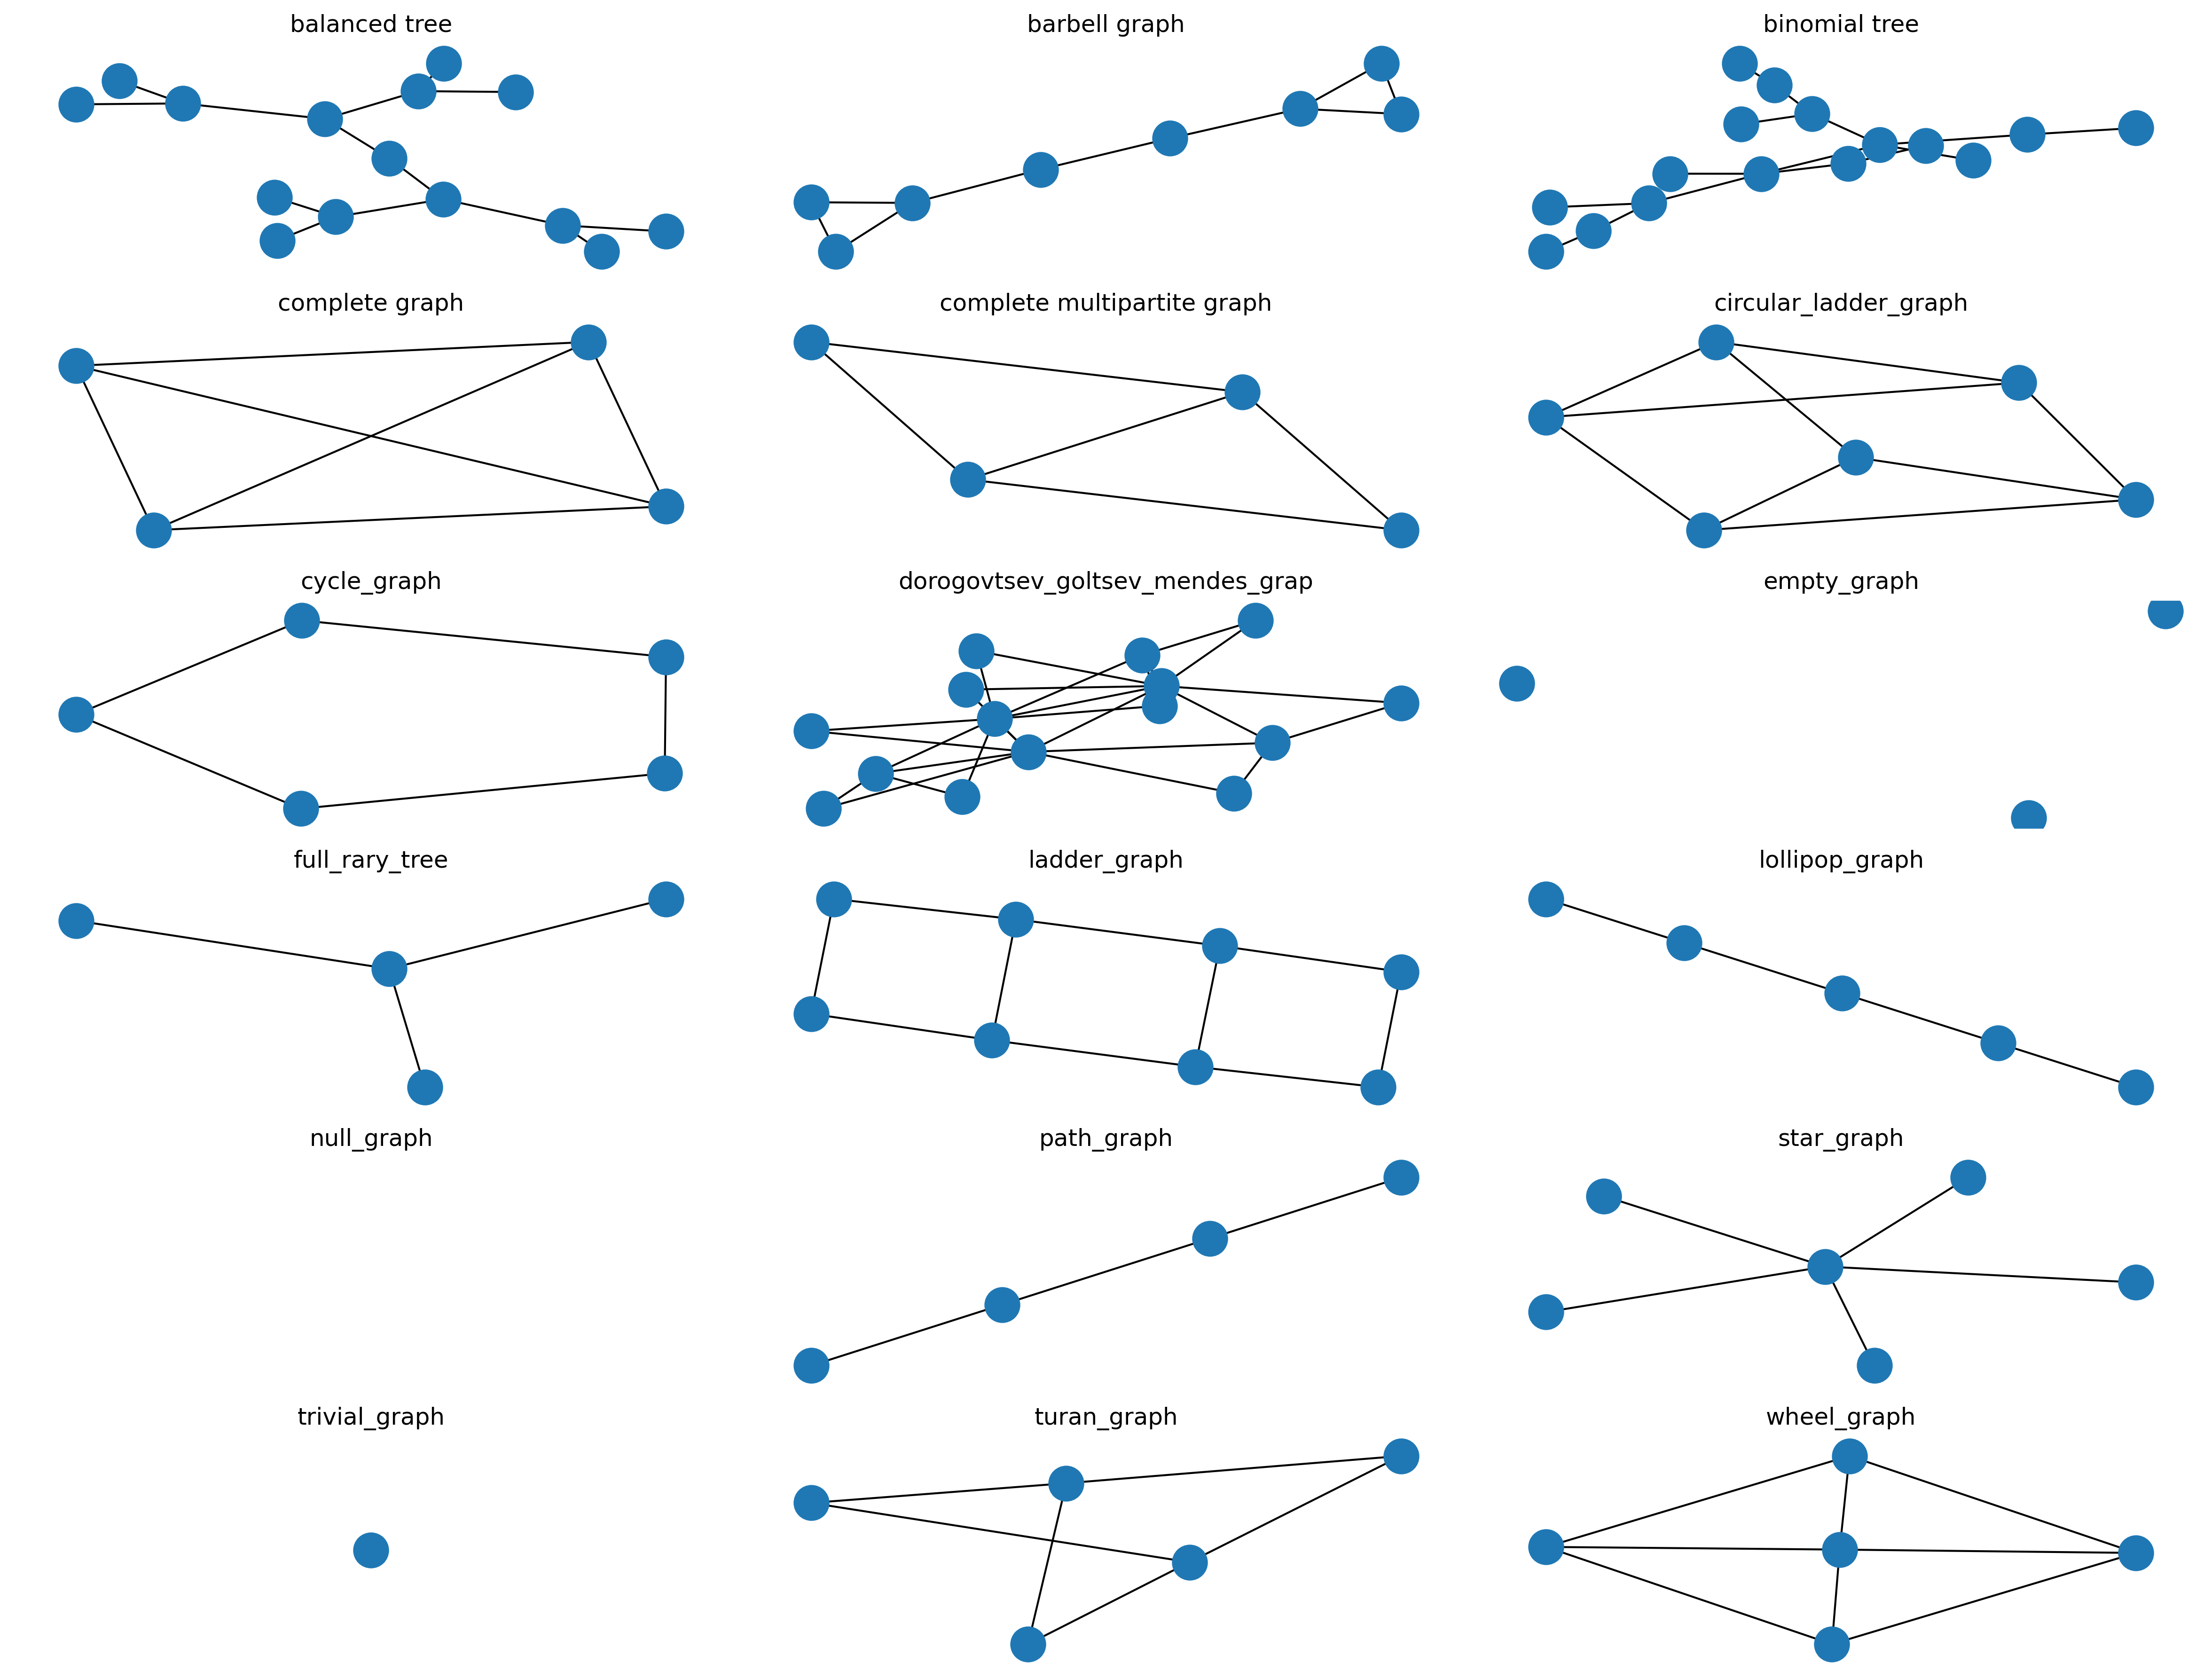

In [95]:
fig = plt.figure(figsize=(21, 12), dpi=300)
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(18, 12)

ax = []

G = [
    ['balanced tree', nx.balanced_tree(r=2, h=3),],
    ['barbell graph', nx.barbell_graph(3, 2),],
    ['binomial tree', nx.binomial_tree(4),],
    ['complete graph', nx.complete_graph(4),],
    ['complete multipartite graph', nx.complete_multipartite_graph(2,1,1)], # 全连接多部图
    ['circular_ladder_graph', nx.circular_ladder_graph(3)],
    ['cycle_graph', nx.cycle_graph(5)],
    ['dorogovtsev_goltsev_mendes_grap', nx.dorogovtsev_goltsev_mendes_graph(3)],
    ['empty_graph', nx.empty_graph(3)],
    ['full_rary_tree', nx.full_rary_tree(3,4)],
    ['ladder_graph', nx.ladder_graph(4)],
    ['lollipop_graph',nx.lollipop_graph(2,3)],
    ['null_graph', nx.null_graph()],
    ['path_graph',nx.path_graph(4)],
    ['star_graph',nx.star_graph(5)],
    ['trivial_graph',nx.trivial_graph()],
    ['turan_graph',nx.turan_graph(5,2)],
    ['wheel_graph',nx.wheel_graph(5)],
]

    # ['cubical graph', nx.cubical_graph(),],
    # ['random regular graph', nx.random_regular_graph(d=4, n=8) ] # d*n 必须是偶数
for i in range(len(G)):
    row, col = i//3, i%3
    ax.append(fig.add_subplot(axgrid[3*row:3*(row+1), 3*col:3*(col+1)]))

    nx.draw(G[i][1],ax=ax[i],)
    ax[i].set_title(G[i][0])

fig.tight_layout()


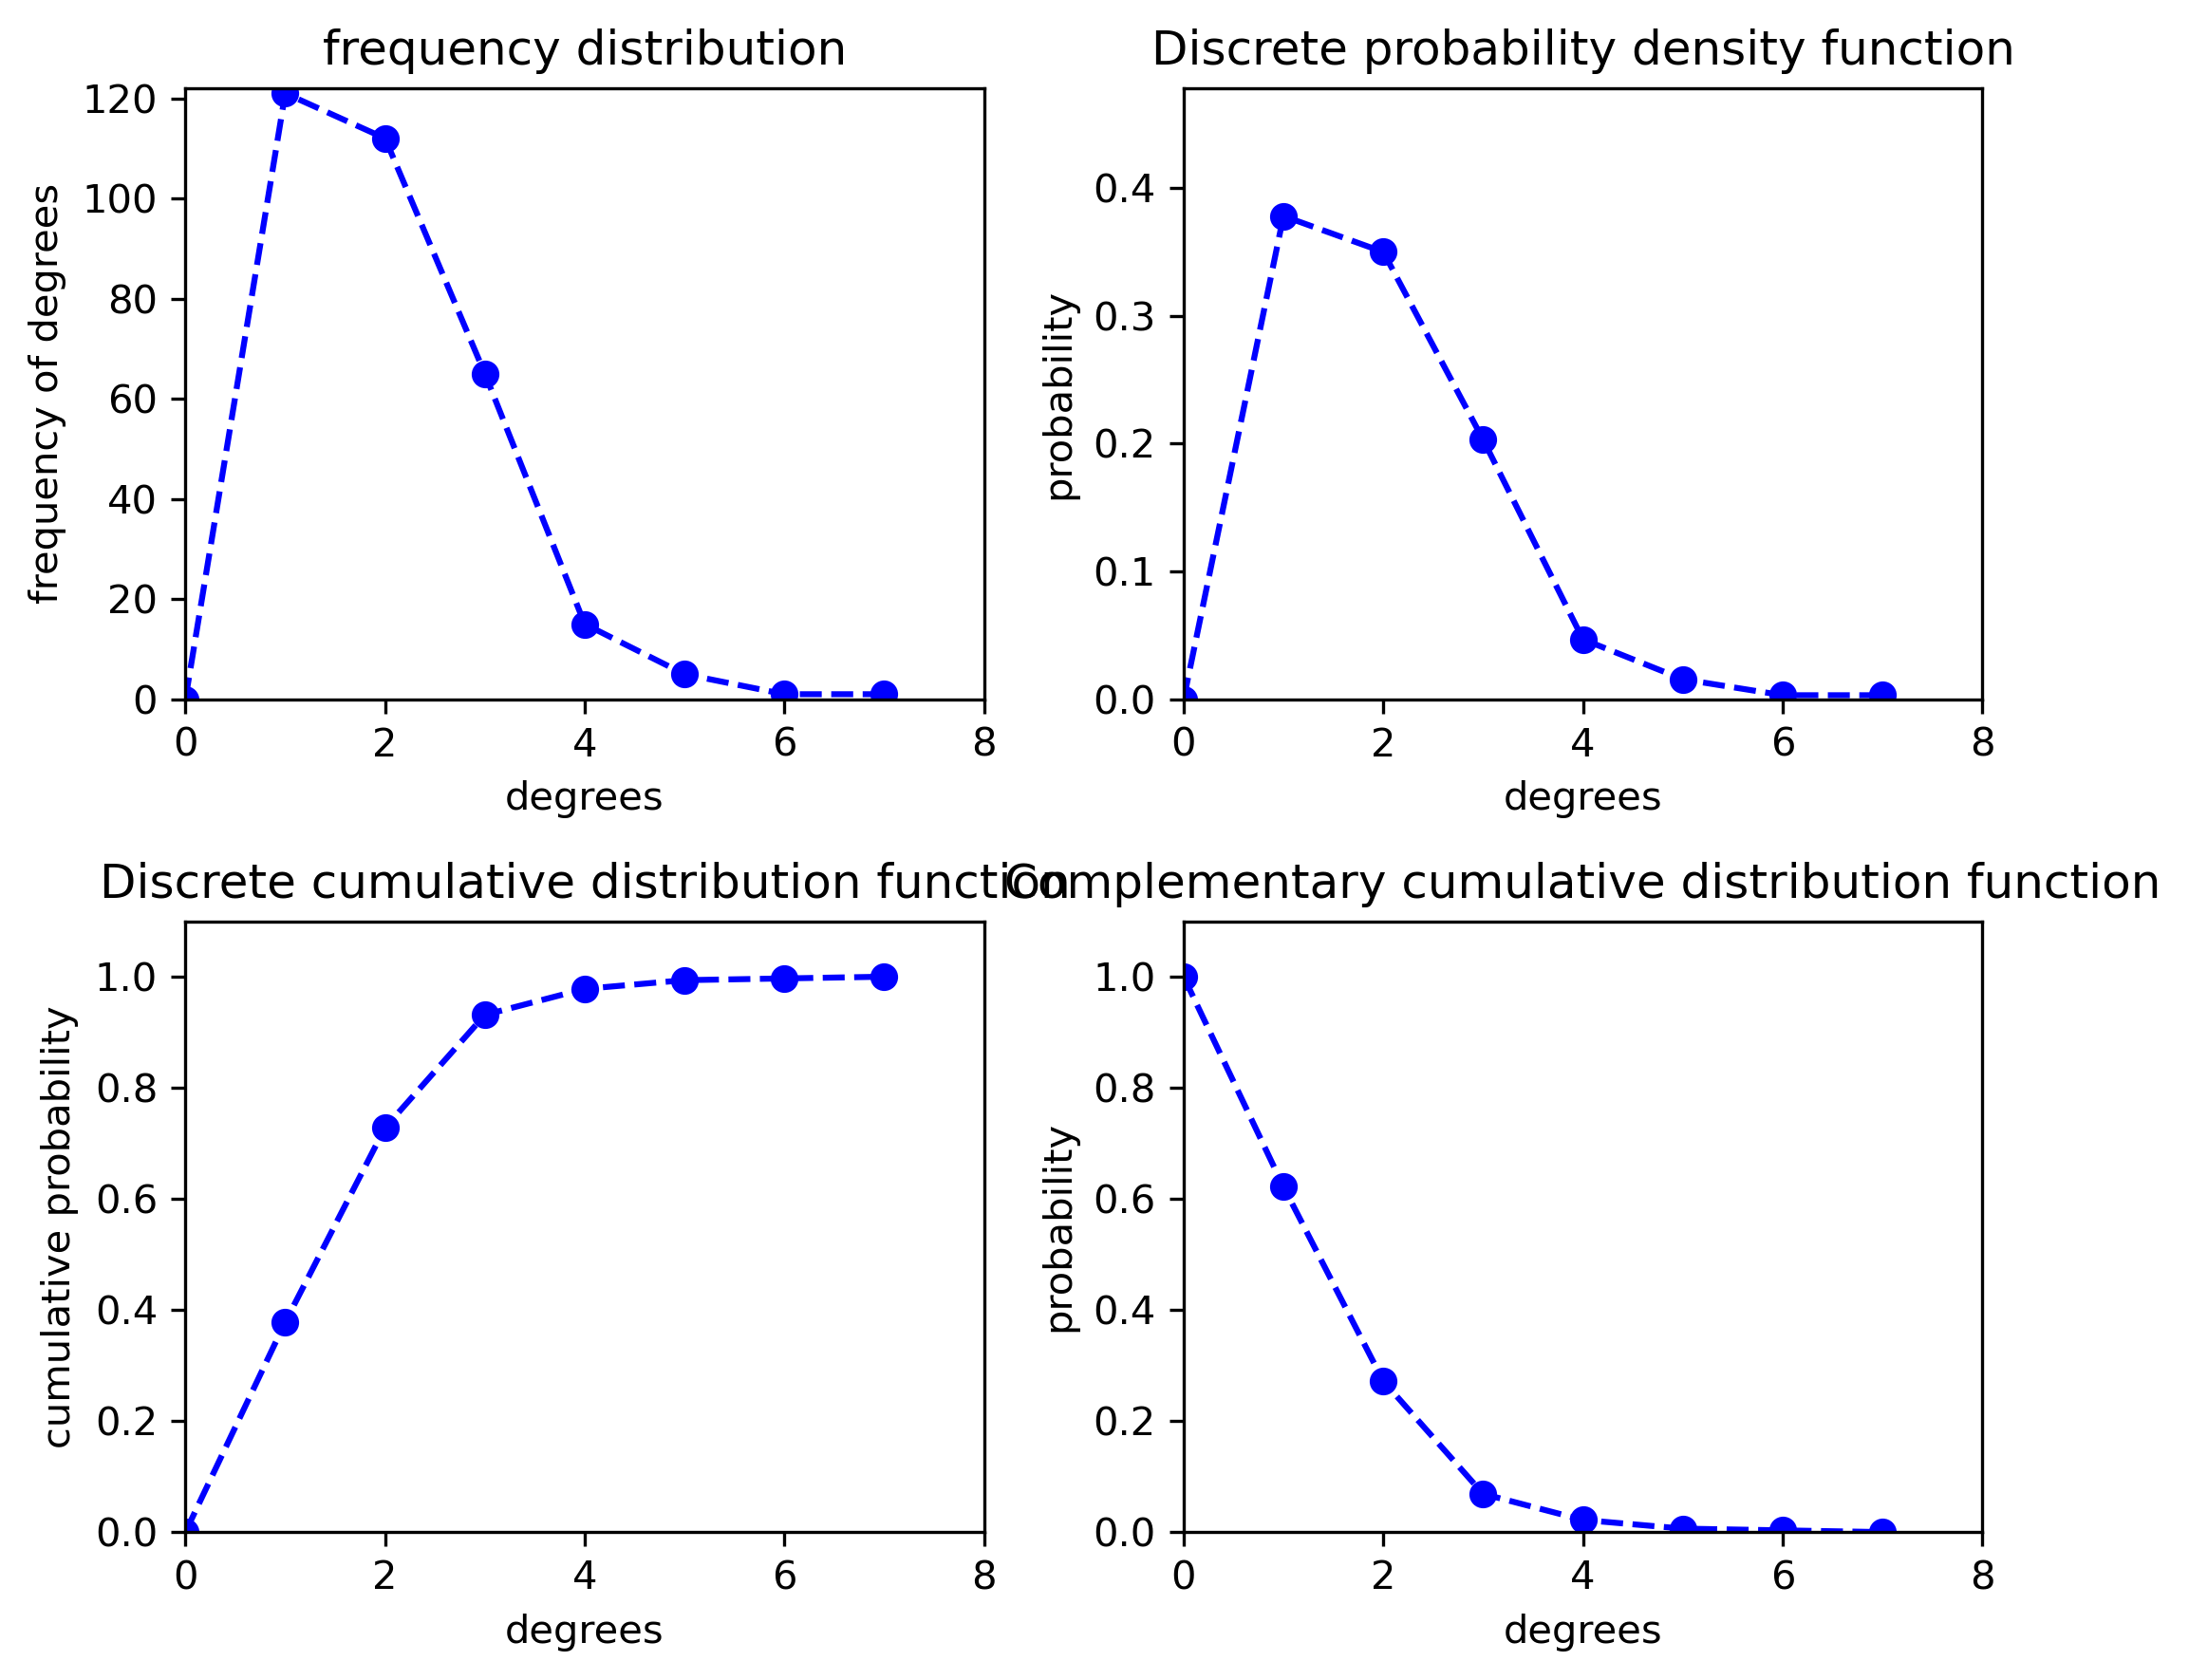

In [191]:
import numpy as np

G = nx.random_tree(320) # random graph

# 网上太多错误的计算方法
def get_freq(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    freq = np.bincount(degree_sequence) ## bincount 返回值域内整数的计数
    return freq

def get_pdf(freq):
    prob = freq/freq.sum()
    return prob

def get_cdf(freq):
    s = float(freq.sum())
    cdf = freq.cumsum(0)/s
    return cdf


fig, axes = plt.subplots(2,2, figsize=(3.60236*2, 6), dpi=300)
axes = axes.flatten()

freq = get_freq(G)

axes[0].plot(range(len(freq)), freq, 'b--o')
#axes[0].set_xscale('log')
axes[0].set_ylim((0, max(freq)+1))
axes[0].set_xlim((0, len(freq)))
axes[0].set_ylabel('frequency of degrees')
axes[0].set_xlabel('degrees')
axes[0].set_title('frequency distribution')

prob = get_pdf(freq)
axes[1].plot(range(len(prob)), prob, 'b--o')
#axes[0].set_xscale('log')
axes[1].set_ylim((0,max(prob)+0.1))
axes[1].set_xlim((0,len(prob)))
axes[1].set_ylabel('probability')
axes[1].set_xlabel('degrees')
axes[1].set_title('Discrete probability mass function')

cdf = get_cdf(freq)
axes[2].plot(range(len(cdf)), cdf, 'b--o')
#axes[0].set_xscale('log')
axes[2].set_ylim((0,max(cdf)+0.1))
axes[2].set_xlim((0,len(cdf)))
axes[2].set_ylabel('cumulative probability')
axes[2].set_xlabel('degrees')
axes[2].set_title('Discrete cumulative distribution function')

ccdf = 1-cdf
axes[3].plot(range(len(ccdf)), ccdf, 'b--o')

axes[3].set_ylim((0,max(ccdf)+0.1))
axes[3].set_xlim((0,len(ccdf)))
axes[3].set_ylabel('probability')
axes[3].set_xlabel('degrees')
axes[3].set_title('Complementary cumulative distribution function')

fig.tight_layout()


* 离散变量为什么会有pdf？应该是概率质量函数
* 如何计算是否服从幂律分布

[math105](https://blogs.ubc.ca/math105/about/)

[](https://blogs.ubc.ca/math105/about/)